In [69]:
import os
import numpy as np
import icecream as ic
import matplotlib.pyplot as plt

from isomap import IsoMap

In [50]:
path_to_data = 'data/'

In [51]:
fname = os.path.join(path_to_data, 'ps2-data-1.txt')
X = np.loadtxt(fname)

/Users/gil2rok/mambaforge/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


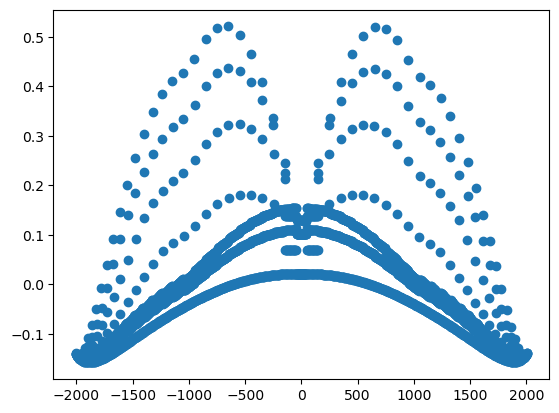

In [68]:
isomap = IsoMap(X)
Y = isomap.fit(k=10, d=2)
plt.scatter(Y[:, 0], Y[:, 1])

In [75]:
from sklearn.neighbors import KNeighborsTransformer 
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import solve

In [134]:
class LocallyLinearEmbedding:
    def __init__(self, X):
        self.X = X
        self.n = X.shape[0] # num data points
        
    def linear_combination_weights(self, i):
        xi = self.X[i:i+1].T # i-th data point, xi
        G = (xi - self.nn).T @ (xi - self.nn) # gram matrix
        ones = np.ones(self.k)
        
        print(G.shape)
        w = solve(G, ones, assume_a='sym') # solve for linear combination weights w
        return w
    
    def knn(self, i):
        nearest_neighbors = NearestNeighbors(n_neighbors=self.k).fit(self.X)
        nn_idx = nearest_neighbors.kneighbors(self.X[i:i+1], return_distance=False)
        self.nn = self.X[nn_idx].squeeze().T

    def fit(self, k=5, d=2):
        self.k = k # k nearest neighbors
        self.d = d # lower dimensional embedding
        self.W = np.zeros((self.n, self.k))
        
        for i in range(self.n):
            self.knn(i)
            self.W[i] = self.linear_combination_weights(i)
        

In [135]:
lle = LocallyLinearEmbedding(X)
lle.fit(k=5, d=2)

(5, 5)


LinAlgError: Matrix is singular.